<a href="https://colab.research.google.com/github/Sharan1102/Data_Science_Projects-/blob/main/ML_Projects(H1N1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split


In [ ]:
df=pd.read_csv("/content/h1n1_vaccine_prediction.csv")
df

In [ ]:
df.isnull().sum()

unique_id                        0
h1n1_worry                      92
h1n1_awareness                 116
antiviral_medication            71
contact_avoidance              208
bought_face_mask                19
wash_hands_frequently           42
avoid_large_gatherings          87
reduced_outside_home_cont       82
avoid_touch_face               128
dr_recc_h1n1_vacc             2160
dr_recc_seasonal_vacc         2160
chronic_medic_condition        971
cont_child_undr_6_mnths        820
is_health_worker               804
has_health_insur             12274
is_h1n1_vacc_effective         391
is_h1n1_risky                  388
sick_from_h1n1_vacc            395
is_seas_vacc_effective         462
is_seas_risky                  514
sick_from_seas_vacc            537
age_bracket                      0
qualification                 1407
race                             0
sex                              0
income_level                  4423
marital_status                1408
housing_status      

In [ ]:
df=df.fillna(df.mode().iloc[0]) # filling the missing value with mode
# or    df=df.fillna(method="ffill",axis=1)
df


,unique_id,h1n1_worry,h1n1_awareness,antiviral_medication,contact_avoidance,bought_face_mask,wash_hands_frequently,avoid_large_gatherings,reduced_outside_home_cont,avoid_touch_face,...,race,sex,income_level,marital_status,housing_status,employment,census_msa,no_of_adults,no_of_children,h1n1_vaccine
0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,White,Female,Below Poverty,Not Married,Own,Not in Labor Force,Non-MSA,0.0,0.0,0
1,1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,...,White,Male,Below Poverty,Not Married,Rent,Employed,"MSA, Not Principle City",0.0,0.0,0
2,2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,White,Male,"<= $75,000, Above Poverty",Not Married,Own,Employed,"MSA, Not Principle City",2.0,0.0,0
3,3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,White,Female,Below Poverty,Not Married,Rent,Not in Labor Force,"MSA, Principle City",0.0,0.0,0
4,4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,...,White,Female,"<= $75,000, Above Poverty",Married,Own,Employed,"MSA, Not Principle City",1.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26702,26702,2.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,White,Female,"<= $75,000, Above Poverty",Not Married,Own,Not in Labor Force,Non-MSA,0.0,0.0,0
26703,26703,1.0,2.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,White,Male,"<= $75,000, Above Poverty",Not Married,Rent,Employed,"MSA, Principle City",1.0,0.0,0
26704,26704,2.0,2.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,...,White,Female,"<= $75,000, Above Poverty",Not Married,Own,Employed,"MSA, Not Principle City",0.0,0.0,0
26705,26705,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,Hispanic,Female,"<= $75,000, Above Poverty",Married,Rent,Employed,Non-MSA,1.0,0.0,0


In [ ]:
df.isnull().sum()

unique_id                    0
h1n1_worry                   0
h1n1_awareness               0
antiviral_medication         0
contact_avoidance            0
bought_face_mask             0
wash_hands_frequently        0
avoid_large_gatherings       0
reduced_outside_home_cont    0
avoid_touch_face             0
dr_recc_h1n1_vacc            0
dr_recc_seasonal_vacc        0
chronic_medic_condition      0
cont_child_undr_6_mnths      0
is_health_worker             0
has_health_insur             0
is_h1n1_vacc_effective       0
is_h1n1_risky                0
sick_from_h1n1_vacc          0
is_seas_vacc_effective       0
is_seas_risky                0
sick_from_seas_vacc          0
age_bracket                  0
qualification                0
race                         0
sex                          0
income_level                 0
marital_status               0
housing_status               0
employment                   0
census_msa                   0
no_of_adults                 0
no_of_ch

In [ ]:
for col in df.select_dtypes(include=["number"]).columns:
 print(col)

unique_id
h1n1_worry
h1n1_awareness
antiviral_medication
contact_avoidance
bought_face_mask
wash_hands_frequently
avoid_large_gatherings
reduced_outside_home_cont
avoid_touch_face
dr_recc_h1n1_vacc
dr_recc_seasonal_vacc
chronic_medic_condition
cont_child_undr_6_mnths
is_health_worker
has_health_insur
is_h1n1_vacc_effective
is_h1n1_risky
sick_from_h1n1_vacc
is_seas_vacc_effective
is_seas_risky
sick_from_seas_vacc
no_of_adults
no_of_children
h1n1_vaccine


<Axes: >

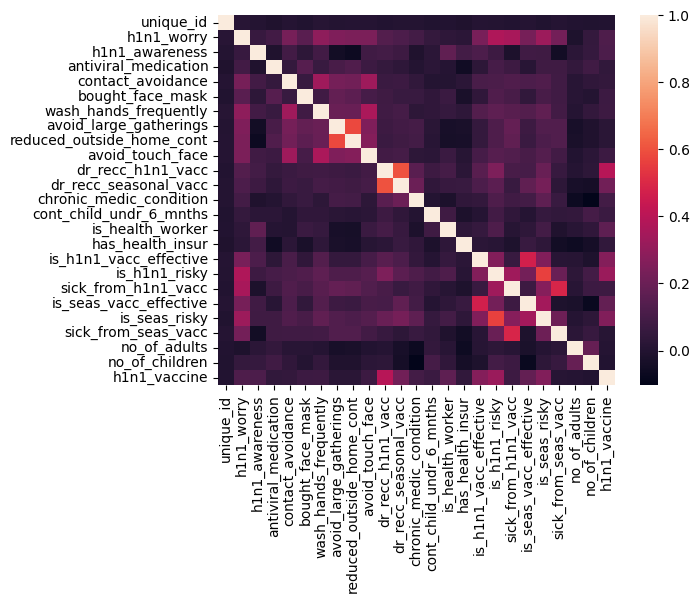

In [ ]:
sns.heatmap(df[[
'unique_id',
'h1n1_worry',
'h1n1_awareness',
'antiviral_medication',
'contact_avoidance',
'bought_face_mask',
'wash_hands_frequently',
'avoid_large_gatherings',
'reduced_outside_home_cont',
'avoid_touch_face',
'dr_recc_h1n1_vacc',
'dr_recc_seasonal_vacc',
'chronic_medic_condition',
'cont_child_undr_6_mnths',
'is_health_worker',
'has_health_insur',
'is_h1n1_vacc_effective',
'is_h1n1_risky',
'sick_from_h1n1_vacc',
'is_seas_vacc_effective',
'is_seas_risky',
'sick_from_seas_vacc',
'no_of_adults',
'no_of_children',
'h1n1_vaccine']].corr(),annot=True)


<Axes: xlabel='h1n1_vaccine', ylabel='count'>

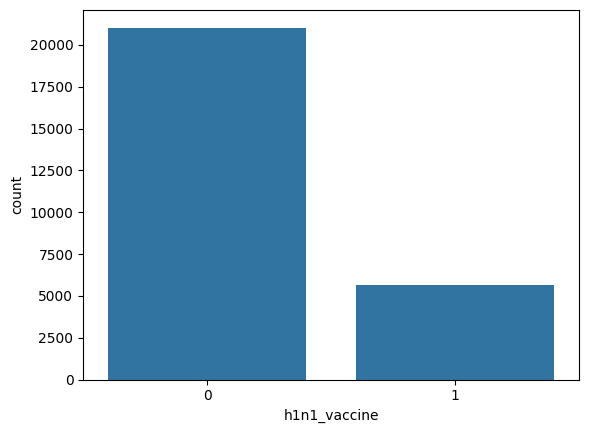

In [ ]:
sns.countplot(x="h1n1_vaccine",data=df)

In [ ]:
df=pd.get_dummies(df,drop_first=False)
df

,unique_id,h1n1_worry,h1n1_awareness,antiviral_medication,contact_avoidance,bought_face_mask,wash_hands_frequently,avoid_large_gatherings,reduced_outside_home_cont,avoid_touch_face,...,marital_status_Married,marital_status_Not Married,housing_status_Own,housing_status_Rent,employment_Employed,employment_Not in Labor Force,employment_Unemployed,"census_msa_MSA, Not Principle City","census_msa_MSA, Principle City",census_msa_Non-MSA
0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,False,True,True,False,False,True,False,False,False,True
1,1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,...,False,True,False,True,True,False,False,True,False,False
2,2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,False,True,True,False,True,False,False,True,False,False
3,3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,False,True,False,True,False,True,False,False,True,False
4,4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,...,True,False,True,False,True,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26702,26702,2.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,False,True,True,False,False,True,False,False,False,True
26703,26703,1.0,2.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,False,True,False,True,True,False,False,False,True,False
26704,26704,2.0,2.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,...,False,True,True,False,True,False,False,True,False,False
26705,26705,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,True,False,False,True,True,False,False,False,False,True


In [ ]:

x = df.drop('h1n1_vaccine',axis=1) # independent cols
y =df["h1n1_vaccine"] #  dependent col
x_train,x_test,y_train,y_test = train_test_split(x,y,train_size=0.8,random_state=42)

In [ ]:
scaler=StandardScaler()
x_train_scaled=scaler.fit_transform(x_train)
x_test_scaled=scaler.transform(x_test)

In [ ]:
# create logistic regression model
model=LogisticRegression()
# train the model on training set
model.fit(x_train_scaled,y_train)

#make prediction on the testing  set
y_pred=model.predict(x_test_scaled)
#evalute the model
accuracy=accuracy_score(y_test,y_pred)
conf_matrix=confusion_matrix(y_test,y_pred)
classification=classification_report(y_test,y_pred)
print("accuracy:",accuracy)
print("conf_matrix:",conf_matrix)
print("classification:",classification)

accuracy: 0.8423811306626732
conf_matrix: [[4014  198]
 [ 644  486]]
classification:               precision    recall  f1-score   support

           0       0.86      0.95      0.91      4212
           1       0.71      0.43      0.54      1130

    accuracy                           0.84      5342
   macro avg       0.79      0.69      0.72      5342
weighted avg       0.83      0.84      0.83      5342



the above confusion matrix is 20% of testing data in whole data